In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import  missingno as msno


In [45]:
data=pd.read_csv("C:/Users/User/Desktop/ML hub/IPL match dataset/matches.csv")

In [46]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [48]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [49]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Ploting the null values

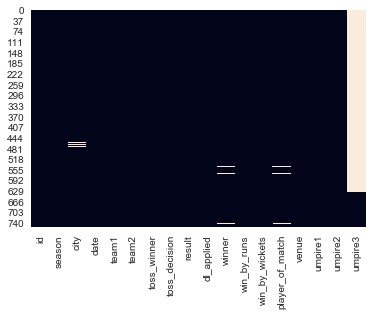

In [50]:

(sns.heatmap(data.isnull(), cbar=False))

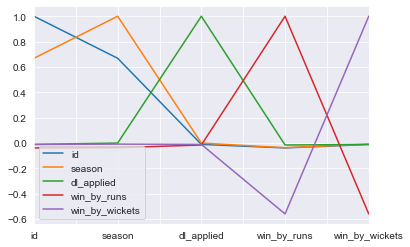

In [51]:
# for finding the correlation 
data.corr().plot()

In [52]:
data.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.668304,-0.011658,-0.039403,-0.012239
season,0.668304,1.000000,-0.001116,-0.037529,-0.009379
dl_applied,-0.011658,-0.001116,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.037529,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.009379,-0.011631,-0.560420,1.000000


## for finding outliers

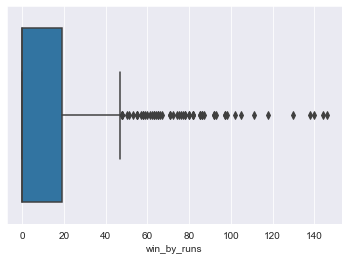

In [57]:
## we can apply this in the features in which ,we want to find is their any outliers
sns.boxplot(x=data['win_by_runs'])

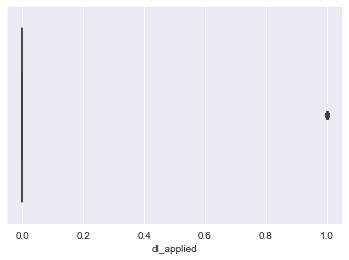

In [58]:
sns.boxplot(x=data['dl_applied'])

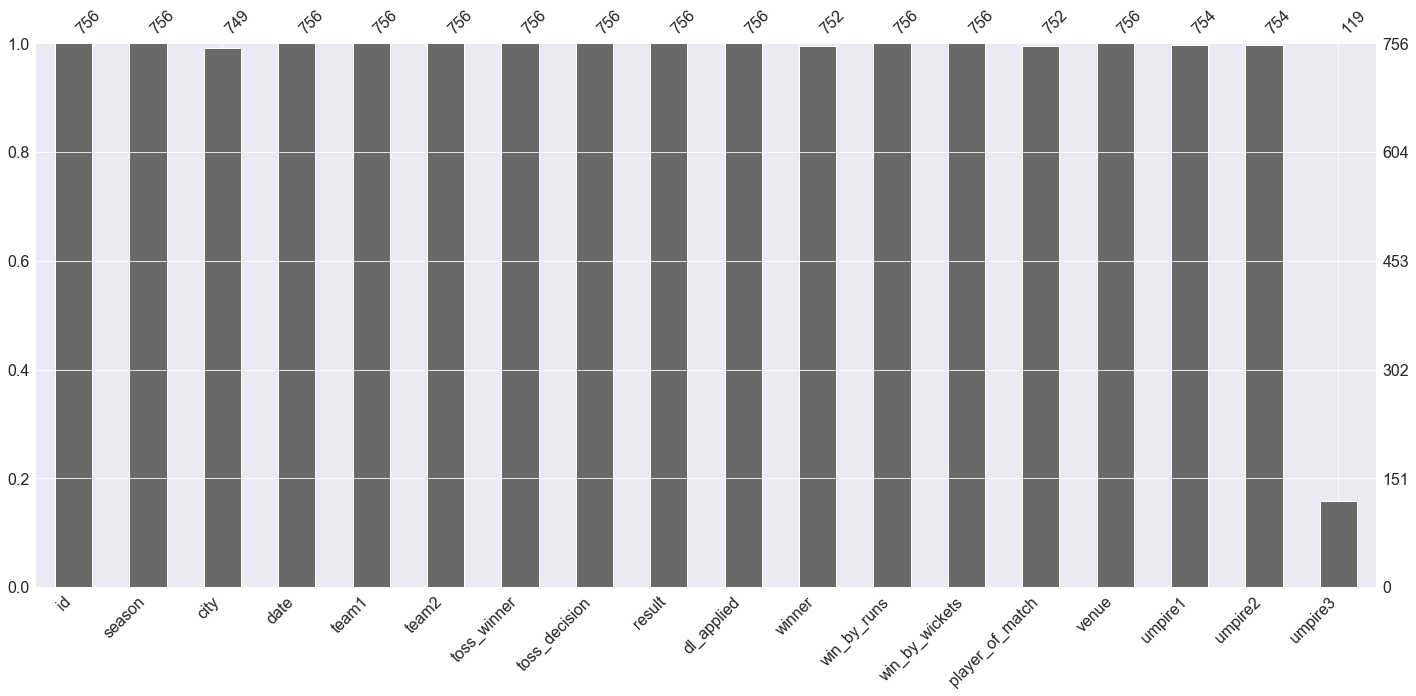

In [53]:
msno.bar(data)

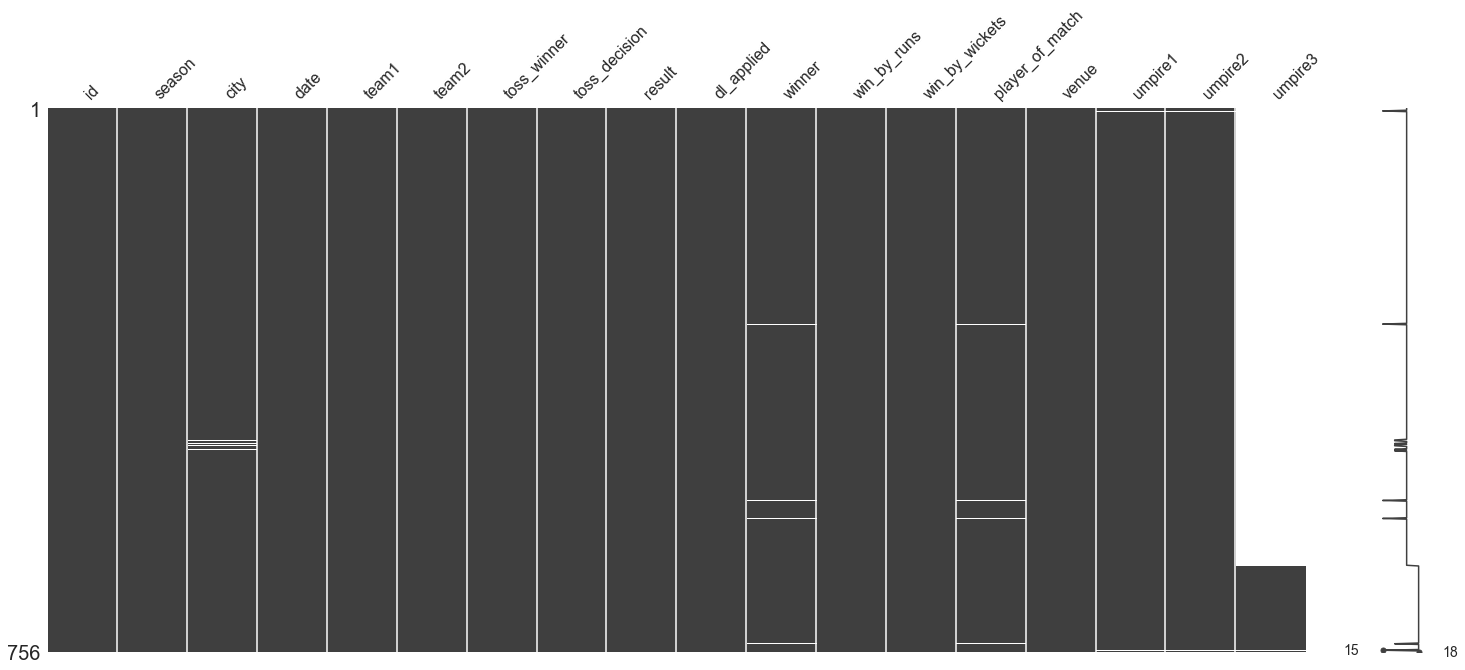

In [54]:
##matrix plot
msno.matrix(data)

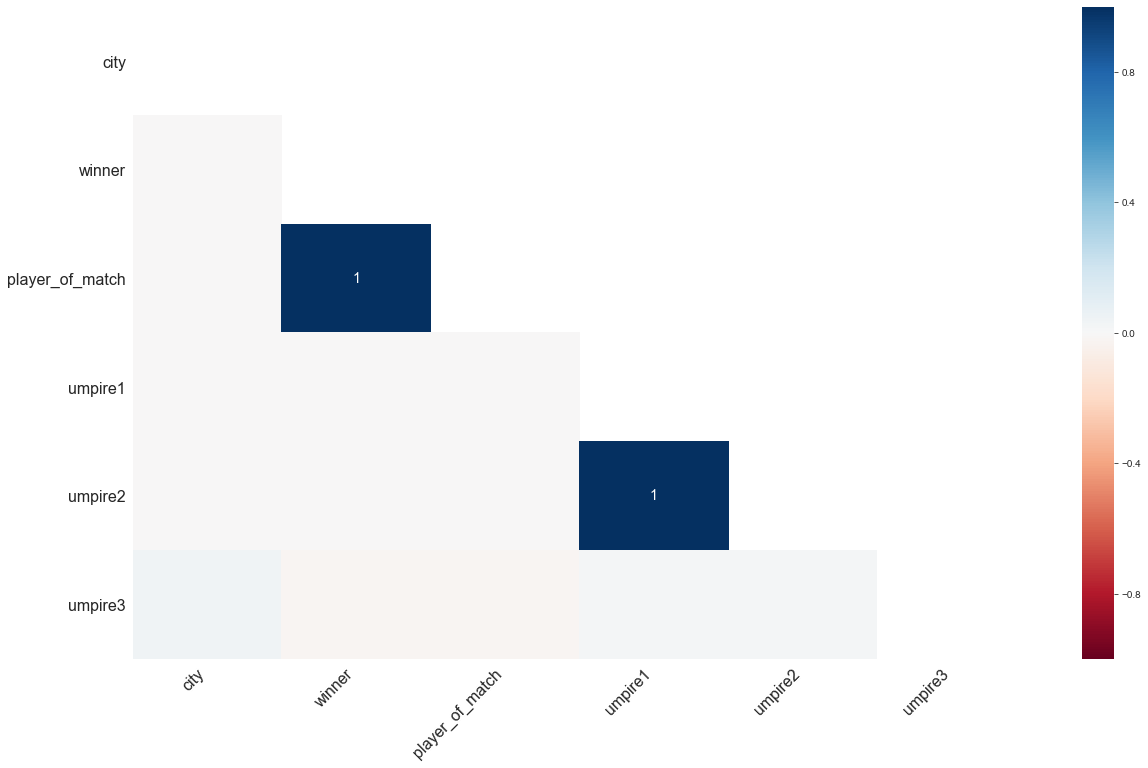

In [55]:
## heatmap
msno.heatmap(data)

## Totall no. of matches happend in cities

Text(0.5, 1.0, 'Demanding cities')

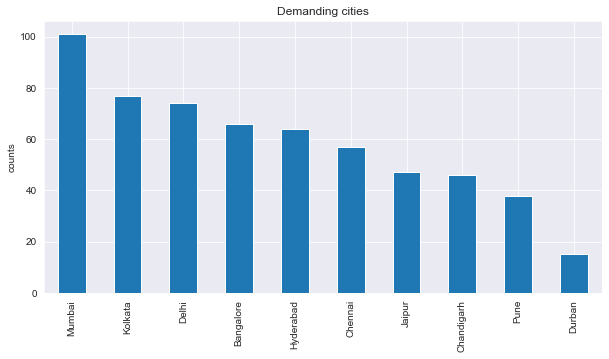

In [25]:
plt.figure(figsize=(10,5))
data.city.value_counts().head(10).plot(kind='bar')
plt.ylabel('counts')
plt.title('Demanding cities')
#top 10 cities

## Most awarded MOM Players in IPL history

In [26]:
data.player_of_match.value_counts().head()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
Name: player_of_match, dtype: int64

## TOP players

Text(0, 0.5, 'no. of awards')

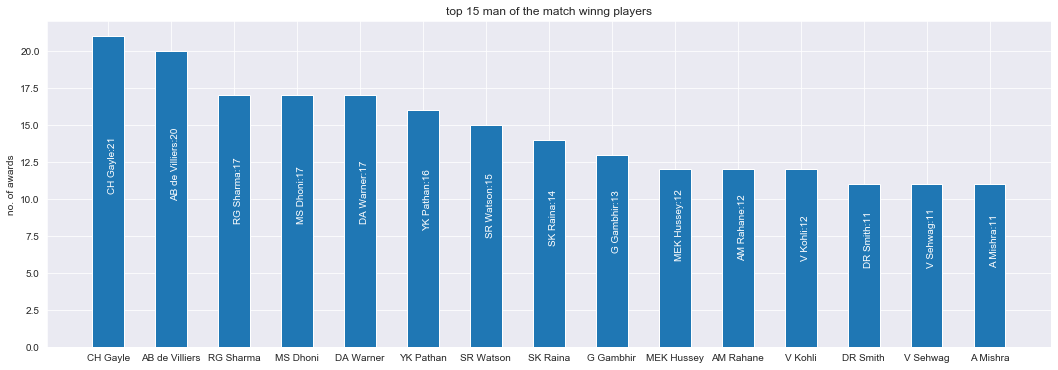

In [27]:
plt.figure(figsize=(18,6))
for name,count in zip(data.player_of_match.value_counts().index[0:15],data.player_of_match.value_counts().head(15)):
    plt.text(name,count/2,str(name)+':'+str(count),rotation=90,color='white')
plt.bar(data.player_of_match.value_counts().index[0:15],data.player_of_match.value_counts().head(15),width=.5)
plt.title('top 15 man of the match winng players')
plt.ylabel('no. of awards')

## Biggest win by runs in each season

In [28]:
win_score=data.groupby('season').win_by_runs.max()

Text(0.5, 1.0, 'Biggest win by runs per season')

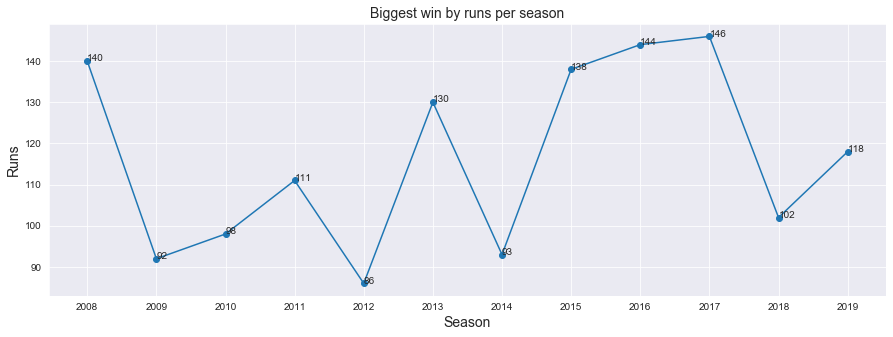

In [29]:
plt.figure(figsize=(15,5))
plt.scatter(x=win_score.index.values,y=win_score.values)
plt.plot(win_score.index.values,win_score.values)
plt.xticks(win_score.index)
for ind,score in zip(win_score.index.values,win_score.values):
    plt.text(ind,score,str(score))
plt.xlabel('Season',fontsize=14)
plt.ylabel('Runs',fontsize=14)
plt.title('Biggest win by runs per season',fontsize=14) 

## Now let's visualize per/SEASON winning performance of each team

In [30]:
def win_count(team_nam):
    df1=pd.DataFrame([])
    tot=[]
    for key,dta in data.groupby(['season']):
        df=dta[(dta.team1==team_nam)|(dta.team2==team_nam)&(dta.winner==team_nam)]
        df1[key]=df.shape[0:1]
        tot.append(dta[(dta.team1==team_nam)|(dta.team2==team_nam)].shape[0])
    
    return df1 ,tot 

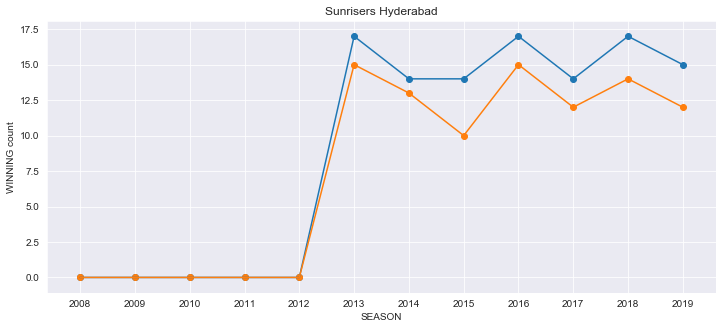

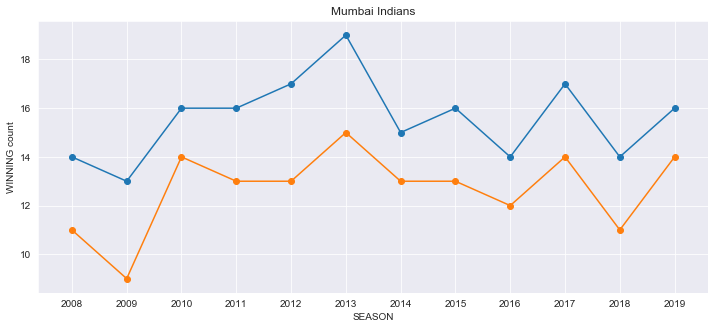

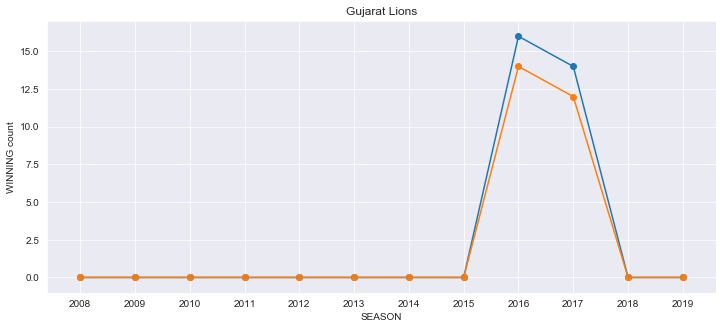

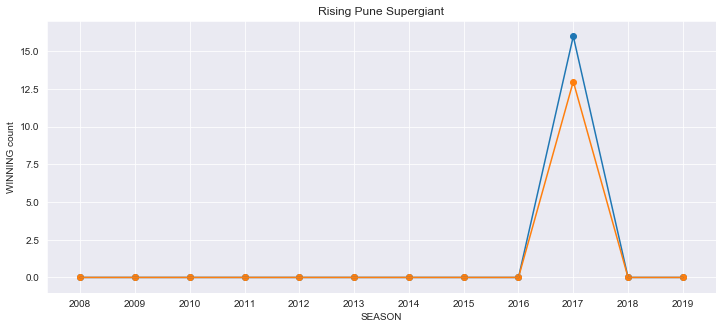

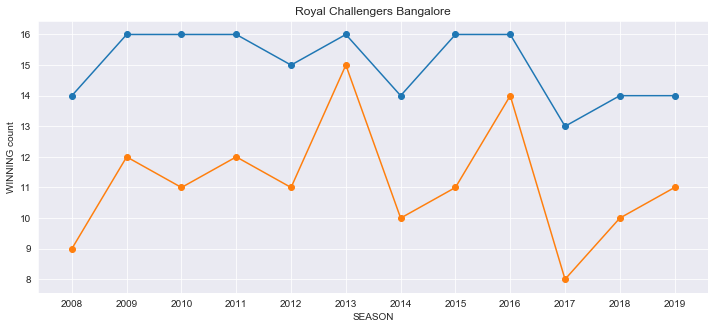

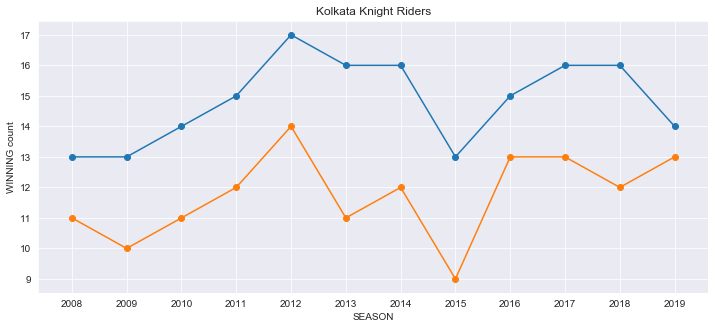

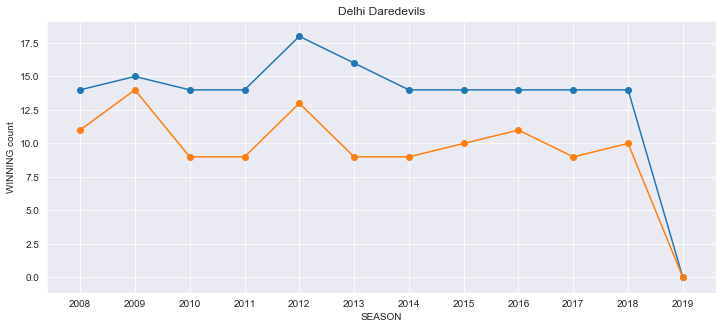

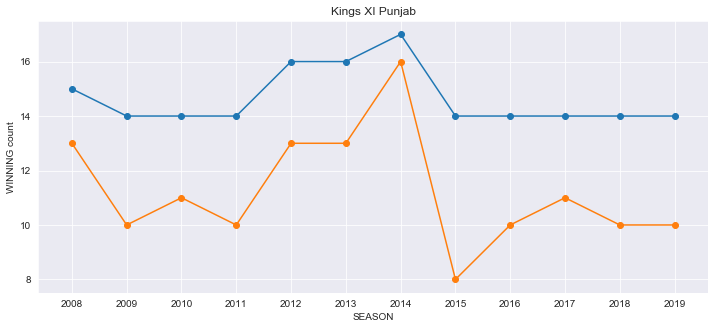

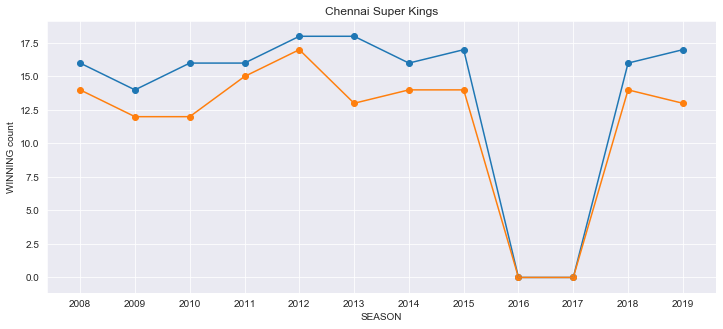

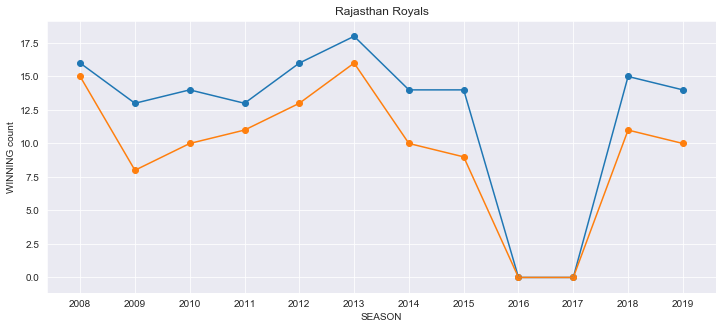

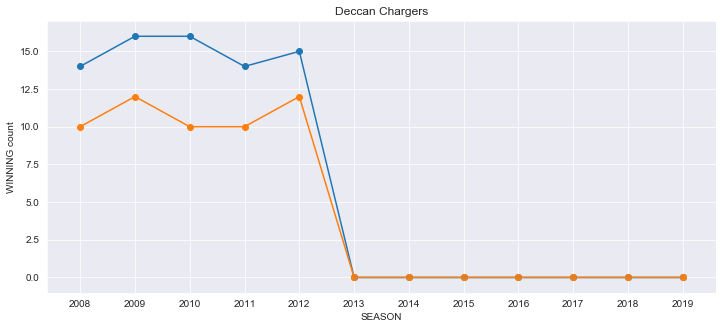

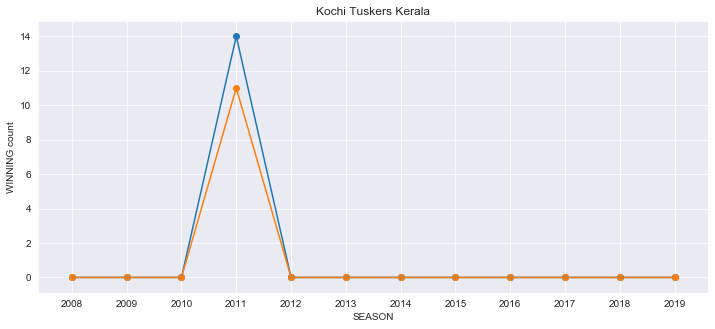

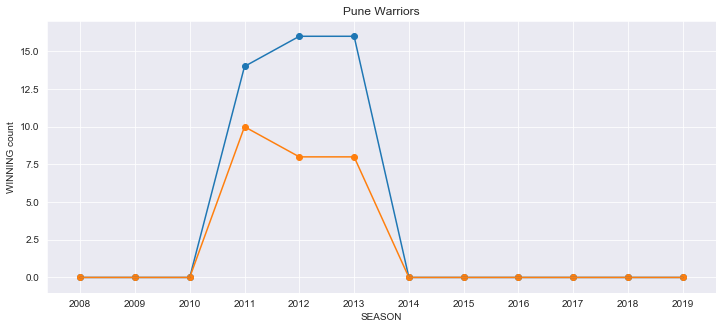

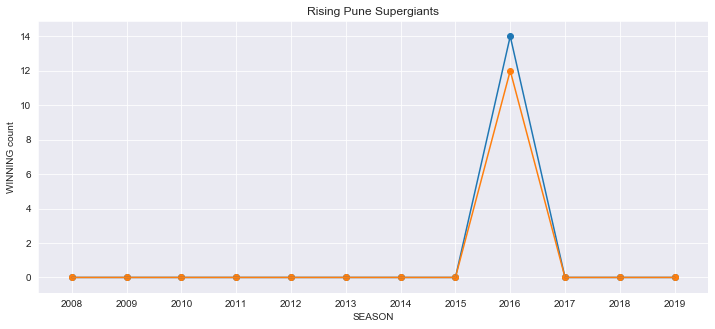

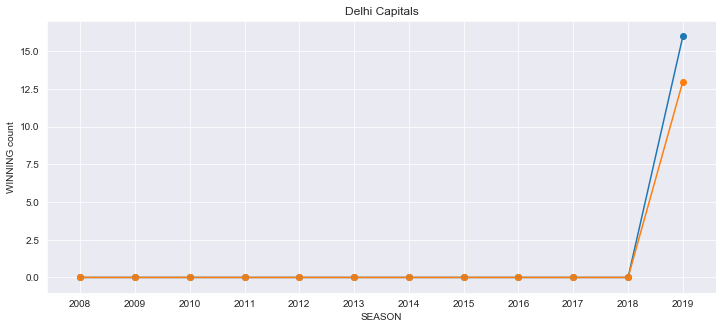

In [31]:
for team in data.team1.unique().tolist():
    
    df,total=win_count(team)
    plt.figure(figsize=(12,5))
    x=list(df.columns.values)
    plt.plot(x,total)
    plt.scatter(x,total)
    plt.title(team)
    plt.scatter(x,df.iloc[0].values)
    plt.xlabel('SEASON')
    plt.ylabel('WINNING count')
    plt.plot(x,df.iloc[0].values)
    
    plt.xticks(x)

## Lets make some functions to do more statistics operations on Battles

In [32]:
df=data[['season','team1','team2','toss_winner','winner']]

In [33]:
df.head()

,season,team1,team2,toss_winner,winner
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,Rising Pune Supergiant
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,Kings XI Punjab
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore


In [34]:
def one_vs_one_per_season(t_a,t_b):
    df2=df[((df.team1==t_a) & (df.team2==t_b)) | ((df.team1==t_b) & (df.team2==t_a))]
    ser=df2.groupby('season').winner.value_counts()
    return pd.DataFrame(ser)

In [35]:
one_vs_one_per_season('Mumbai Indians','Kolkata Knight Riders')

winner
season winner                       
2008   Mumbai Indians              2
2009   Mumbai Indians              2
2010   Kolkata Knight Riders       1
       Mumbai Indians              1
2011   Mumbai Indians              2
2012   Kolkata Knight Riders       1
       Mumbai Indians              1
2013   Mumbai Indians              2
2014   Kolkata Knight Riders       2
2015   Kolkata Knight Riders       1
       Mumbai Indians              1
2016   Mumbai Indians              2
2017   Mumbai Indians              3
2018   Mumbai Indians              2
2019   Kolkata Knight Riders       1
       Mumbai Indians              1

In [36]:
def one_vs_one_all_season(t_a,t_b):
    df2=df[((df.team1==t_a) & (df.team2==t_b)) | ((df.team1==t_b) & (df.team2==t_a))]
    plt.title('Match winning persentage over total matches')
    plt.pie(df2.winner.value_counts().values,shadow=True,labels=[t_a,t_b],explode=(.1,0),autopct='%.1f%%',)

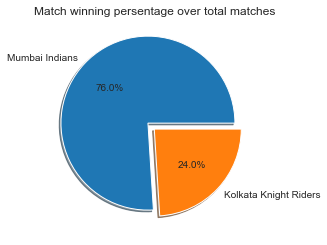

In [37]:
one_vs_one_all_season('Mumbai Indians','Kolkata Knight Riders')

In [38]:
def one_vs_one_toss_win(t_a,t_b):
    df2=df[((df.team1==t_a) & (df.team2==t_b)) | ((df.team1==t_b) & (df.team2==t_a))]
    plt.title('Toss winning persentage over total matches')
    plt.pie(df2.toss_winner.value_counts().values,shadow=True,labels=[t_a,t_b],explode=(.1,0),autopct='%.1f%%',)

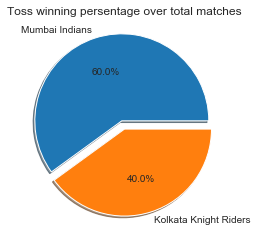

In [39]:
one_vs_one_toss_win('Mumbai Indians','Kolkata Knight Riders')